In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#Abra
prices = pd.read_csv('/content/drive/My Drive/Algo project/abra_price.csv')
print(prices.head())

Mounted at /content/drive
   timestamp  bid_price_1  bid_volume_1  bid_price_2  bid_volume_2  \
0          0         1968            30          NaN           NaN   
1          1         1969             4       1967.0          31.0   
2          2         1966             1       1965.0          21.0   
3          3         1965            25          NaN           NaN   
4          4         1966            25          NaN           NaN   

   bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  ask_price_2  \
0          NaN           NaN         1971            30          NaN   
1          NaN           NaN         1971            31          NaN   
2          NaN           NaN         1969            22          NaN   
3          NaN           NaN         1968            25          NaN   
4          NaN           NaN         1968             6       1969.0   

   ask_volume_2  ask_price_3  ask_volume_3  
0           NaN          NaN           NaN  
1           NaN          NaN  

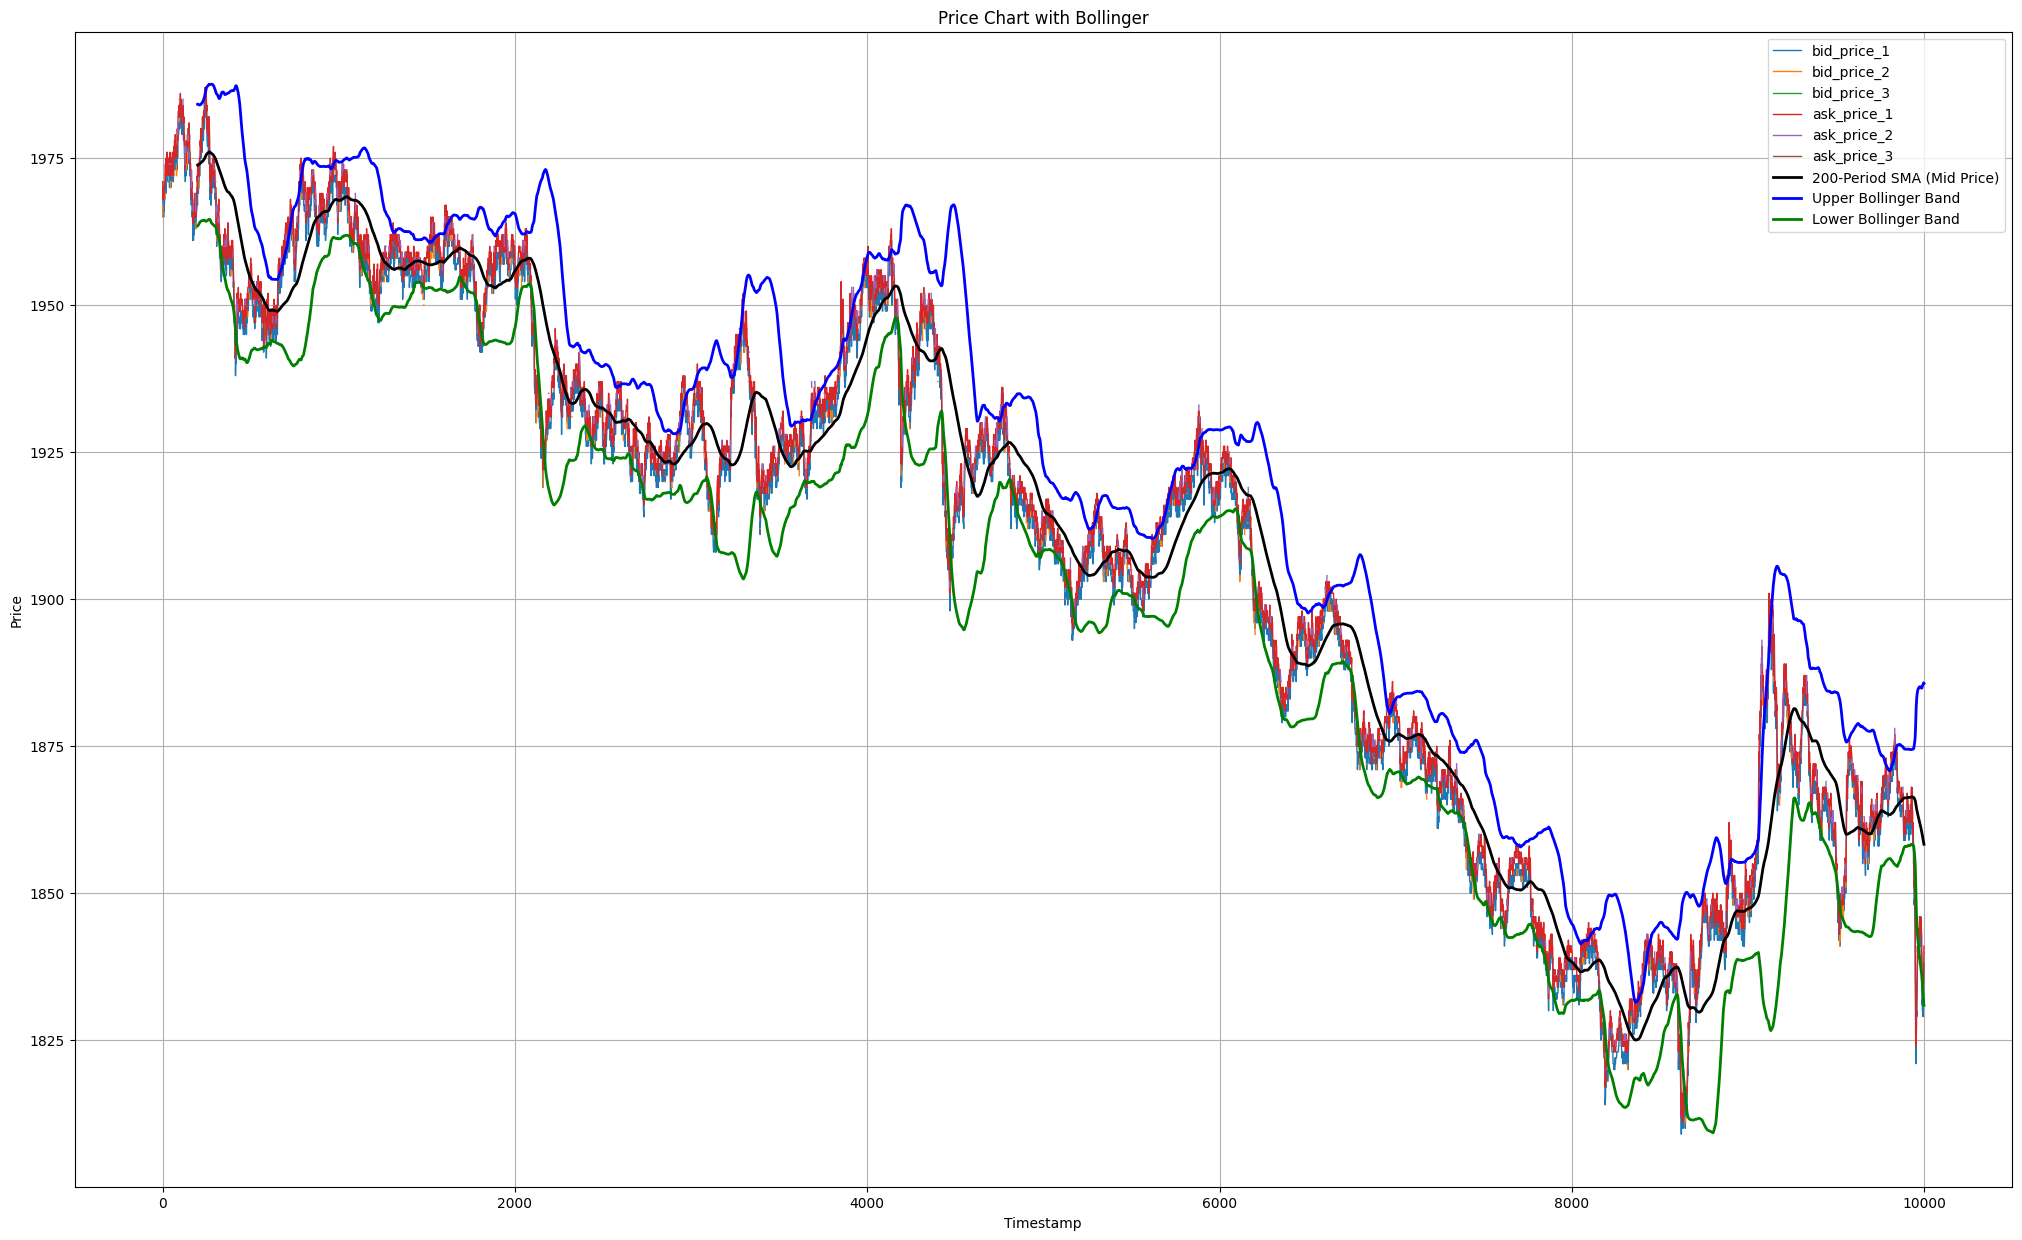

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract columns
ts = prices['timestamp']
bp1 = prices['bid_price_1']
bp2 = prices['bid_price_2']
bp3 = prices['bid_price_3']
ap1 = prices['ask_price_1']
ap2 = prices['ask_price_2']
ap3 = prices['ask_price_3']


window_size = 200
std_mul = 2

# Calculate SMA on mid-price (average of best bid and best ask)
mid_price = (bp1 + ap1) / 2
sma = mid_price.rolling(window=window_size).mean()
rolling_std = mid_price.rolling(window=window_size).std()
upper_band = sma + std_mul * rolling_std
lower_band = sma - std_mul * rolling_std

# Plotting
plt.figure(figsize=(25, 15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

# Plot bid and ask price levels
for label, price_series in price_dict.items():
    plt.plot(ts, price_series, label=label, linewidth=1)

# Plot SMA line
plt.plot(ts, sma, label=f'{window_size}-Period SMA (Mid Price)', color='black', linewidth=2)
plt.plot(ts, upper_band, label=f'Upper Bollinger Band', color='blue', linewidth=2)
plt.plot(ts, lower_band, label=f'Lower Bollinger Band', color='green', linewidth=2)

plt.title('Price Chart with Bollinger')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


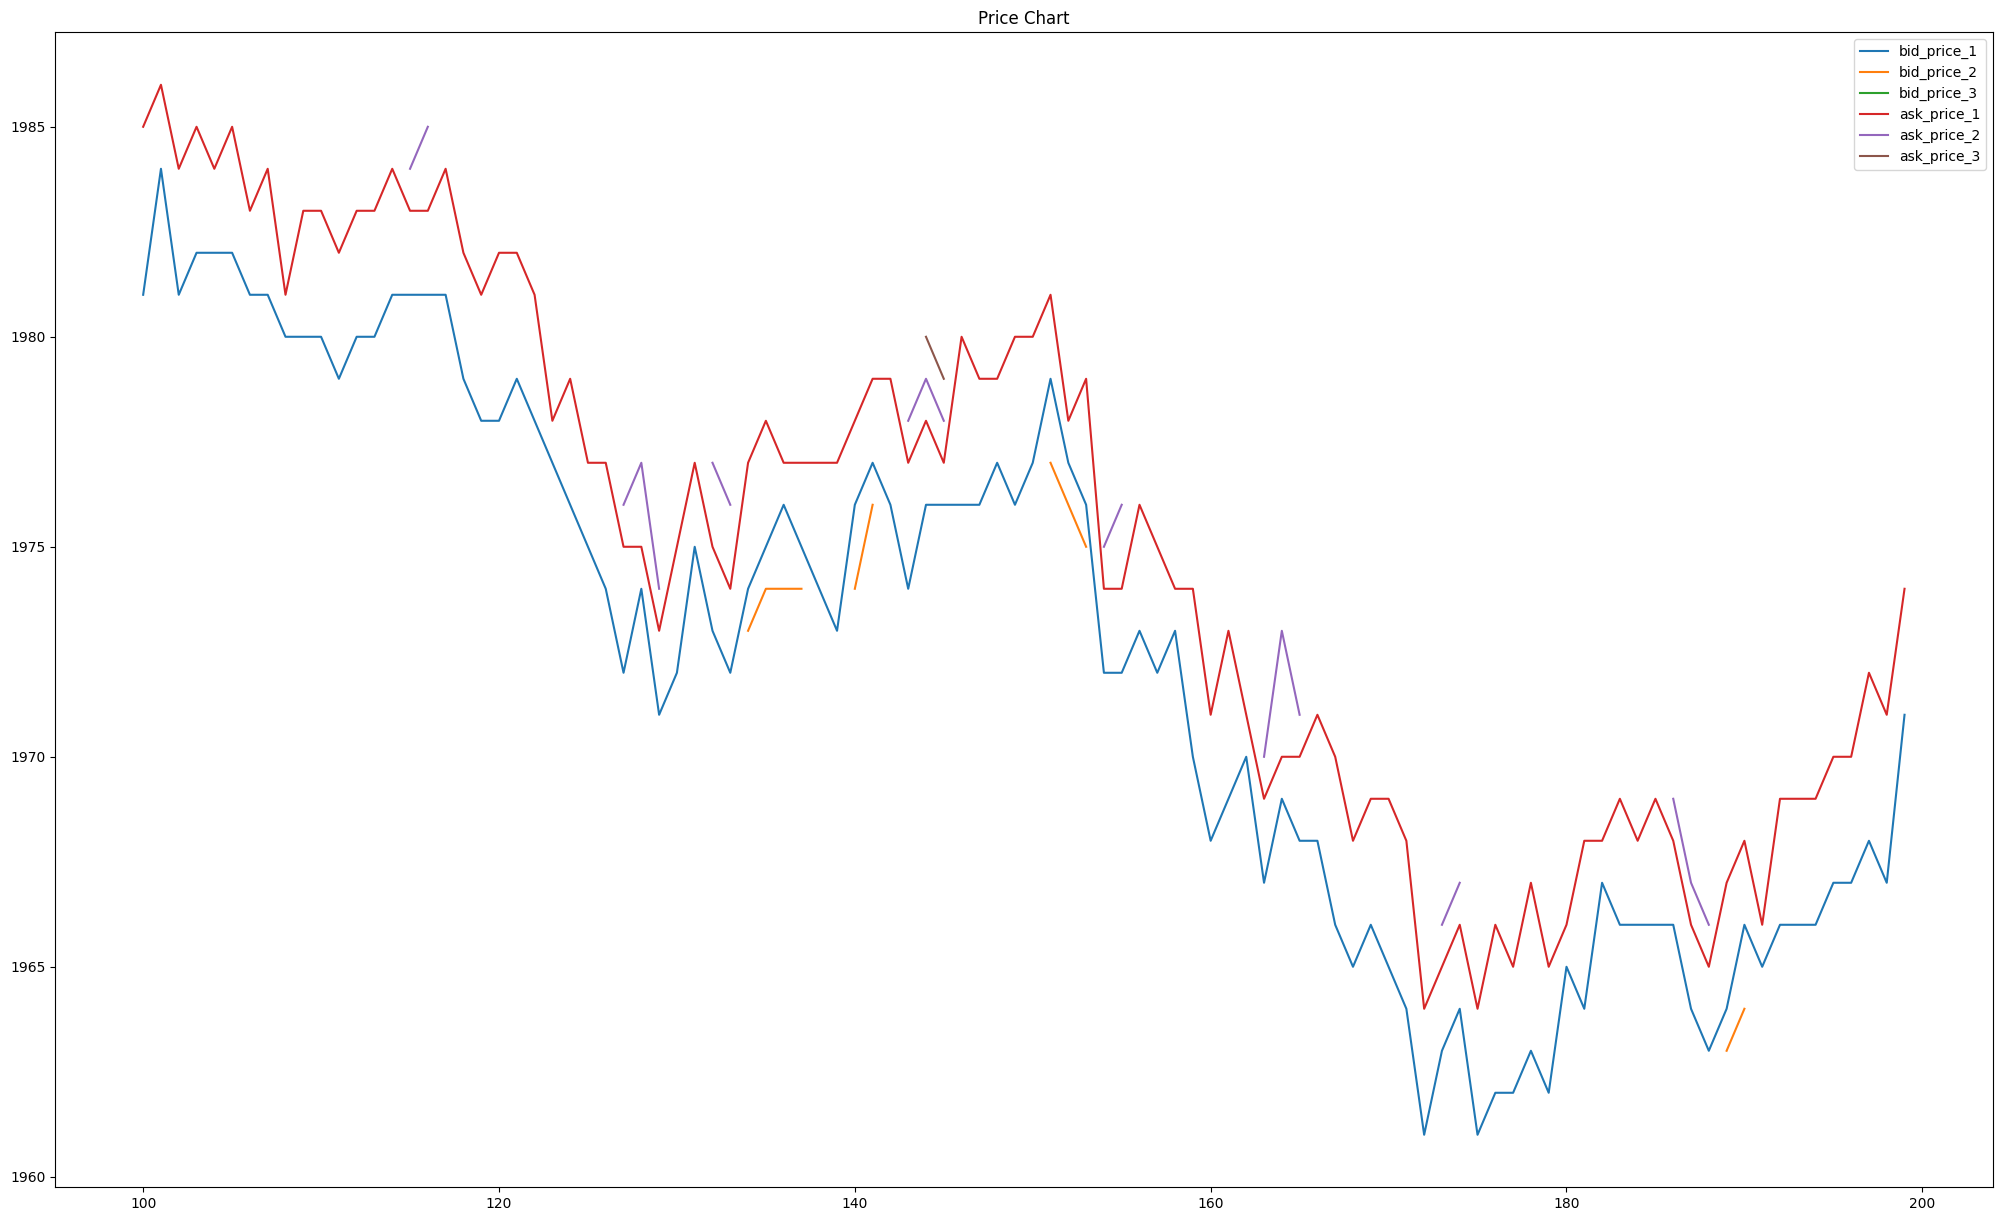

In [3]:
# slice
prices_sliced = prices[100:200]

# copy paste our previous cell and hit run
ts_sliced = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']



plt.figure(figsize=(25,15))
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,

}

for label, price_series in price_dict.items():
    plt.plot(ts_sliced, price_series, label=label)
plt.title('Price Chart')
plt.legend()
plt.show()

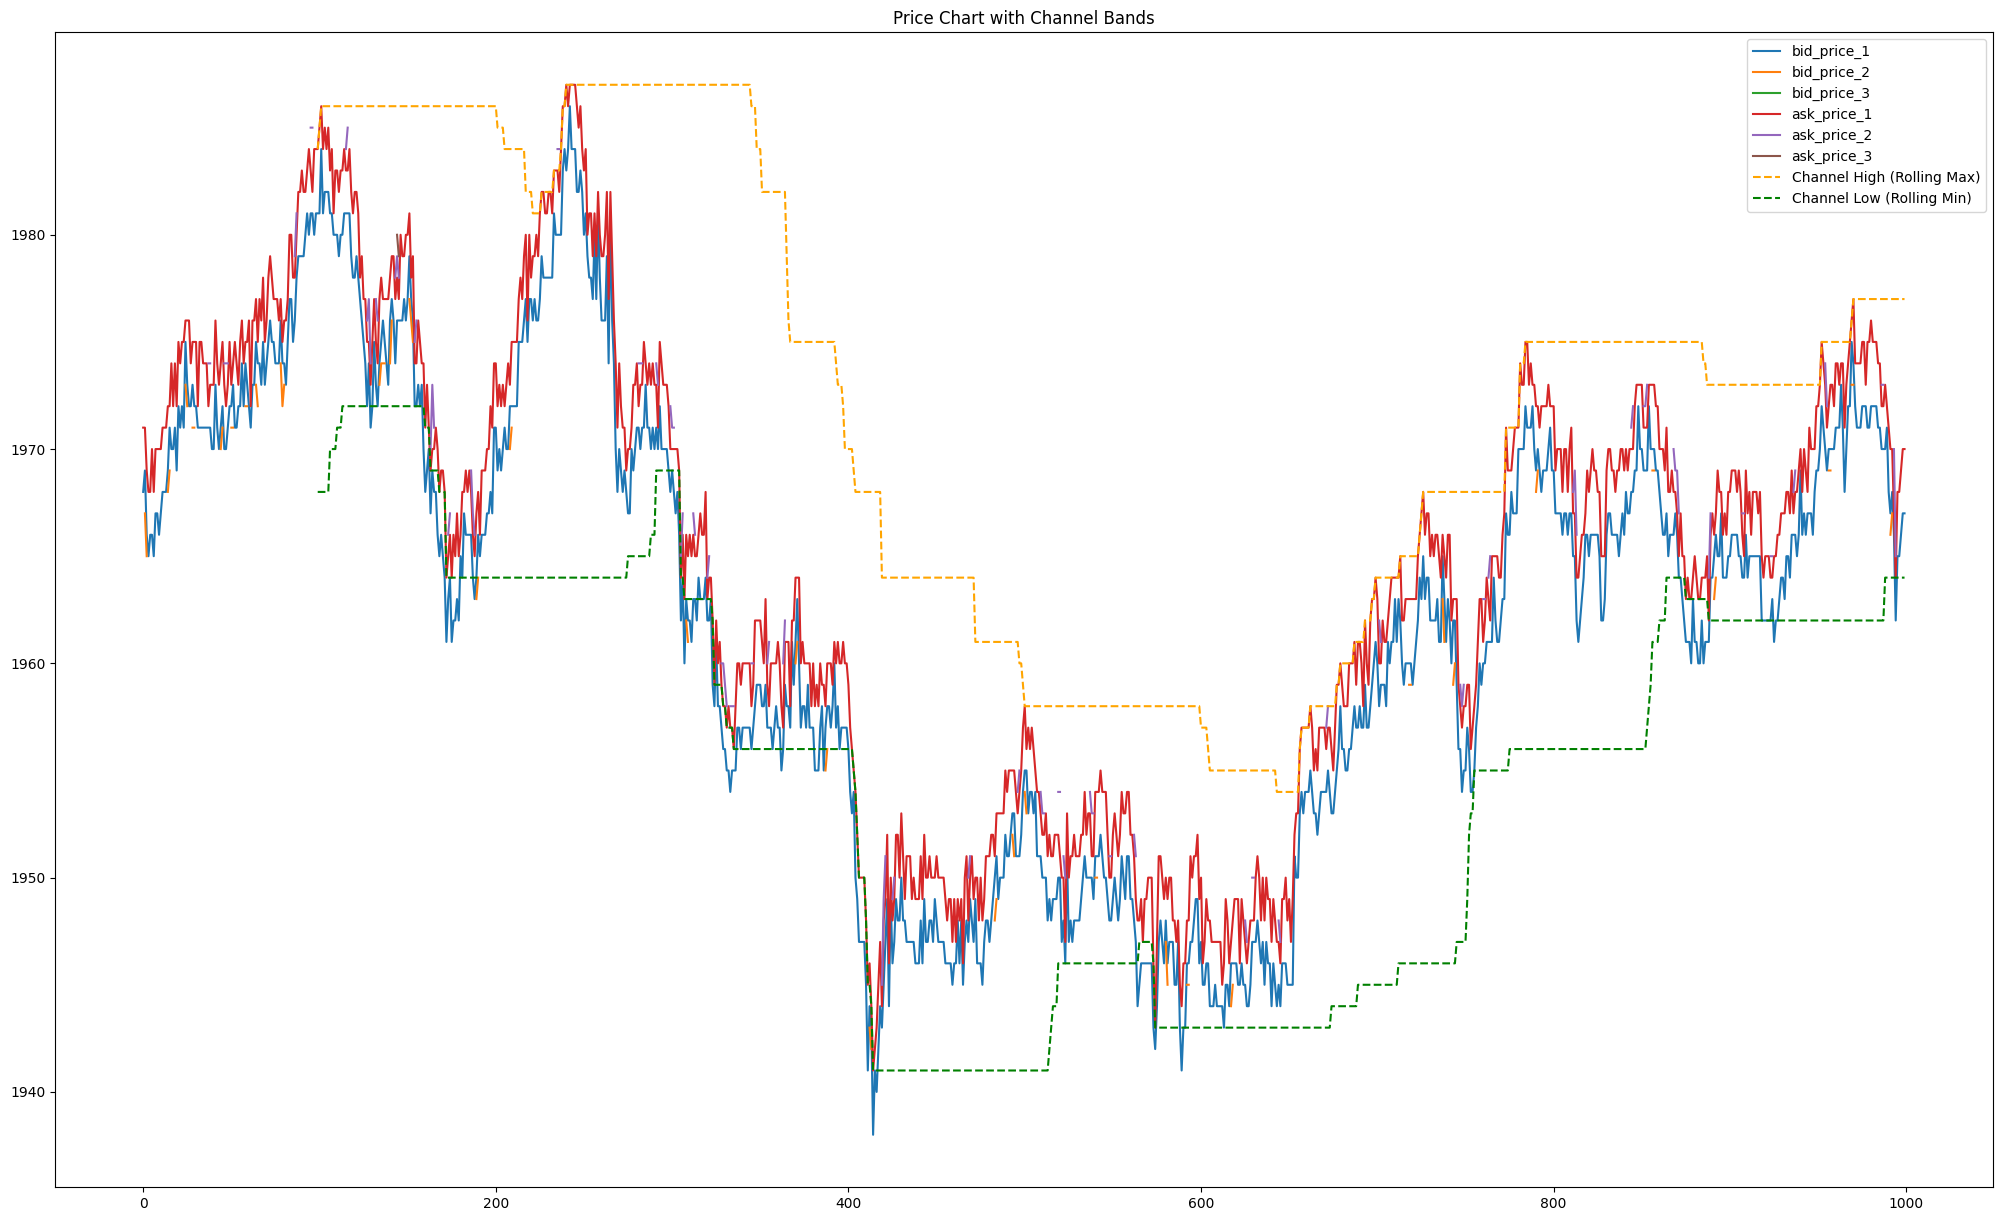

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Slice the data
prices_sliced = prices[0:1000]

# Extract columns
ts_sliced = prices_sliced['timestamp']
bp1 = prices_sliced['bid_price_1']
bp2 = prices_sliced['bid_price_2']
bp3 = prices_sliced['bid_price_3']
ap1 = prices_sliced['ask_price_1']
ap2 = prices_sliced['ask_price_2']
ap3 = prices_sliced['ask_price_3']

# Set a lookback period for the channel
lookback = 100

# Calculate rolling max and min of bid_price_1 (as example)
rolling_max = ap1.rolling(window=lookback).max()
rolling_min = ap1.rolling(window=lookback).min()

# Plot
plt.figure(figsize=(25, 15))

# Price levels
price_dict = {
    'bid_price_1': bp1,
    'bid_price_2': bp2,
    'bid_price_3': bp3,
    'ask_price_1': ap1,
    'ask_price_2': ap2,
    'ask_price_3': ap3,
}

# Plot bid/ask levels
for label, price_series in price_dict.items():
    plt.plot(ts_sliced, price_series, label=label)

# Plot channel bands
plt.plot(ts_sliced, rolling_max, color='orange', linestyle='--', label='Channel High (Rolling Max)')
plt.plot(ts_sliced, rolling_min, color='green', linestyle='--', label='Channel Low (Rolling Min)')

plt.title('Price Chart with Channel Bands')
plt.legend()
plt.show()




The idea is to monitor a rolling price range over a set lookback period. If the current price breaks out of this historical range, it's taken as a signal of reversion to historic mean.

Break above previous highs → Sell signal

Break below previous lows → Buy signal

1. Track Mid Prices
The strategy records the mid-price at every time step (average of best bid and best ask).

2. Define Lookback Window
It uses a lookback window (e.g., 100 past mid-prices) to form a price channel.

Upper Band: Maximum price seen in the lookback window

Lower Band: Minimum price seen in the lookback window

Importantly, it excludes today's price from this calculation to avoid biasing the breakout.

3. Check for Breakouts
Once there’s enough data (i.e., more than 100 mid-prices):

If current mid-price > upper band:
→ This is a breakout above the range
→ Place a sell order

If current mid-price < lower band:
→ This is a breakout below the range
→ Place a buy order

The idea is to ride strong moves in either direction.

4. Place Orders
When a breakout is detected:

It places an order for up to 10 units, or the available volume if it’s lower.

It uses best available price from the order book:

Buy at best ask

Sell at best bid